# <감성 대화 AI 스피커 만들기>

# 1. 감성 대화 데이터 확인



In [1]:
import pandas as pd

In [44]:
# 단어장만들 추가 데이터들
movie_review = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/영화리뷰.csv',encoding='CP949')
purpose = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/용도별목적대화데이터.csv',encoding='CP949')
common_sense = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/일반상식.csv',encoding='CP949')
topic = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/csv_data/주제별일상대화데이터.csv',encoding='CP949')

# 결측값 제거
movie_review.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)

# 감성 대화 데이터
data = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/감성대화_전처리2.csv',encoding='cp949',header=0)
data.reset_index()
data

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
...,...,...,...,...,...,...,...,...
103255,노년,남성,재정,만성질환 무,분노,성가신,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,지금 할 수 있는 가장 합리적인 행동은 무엇인가요?
103256,노년,여성,재정,만성질환 무,불안,초조한,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,어떻게 하면 지금의 기분을 나아지게 할 수 있을까요?
103257,노년,여성,재정,만성질환 무,상처,희생된,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,지금의 상황에서 할 수 있는 가장 좋은 행동이 무엇일까요?
103258,노년,여성,대인관계,만성질환 무,불안,걱정스러운,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,지금의 감정을 나아지게 할 수 있는 어떤 방법이 있을까요?


In [45]:
data.sample(5)

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
86586,청년,여성,"진로,취업,직장",해당없음,분노,악의적인,너무 기분이 나쁘거든. 얘기 안 하면 모를 테니까 그냥 넘어가도 되겠지?,그냥 넘어갈까 생각 중이시군요. 어떻게 하는 게 가장 좋은 방법일까요?
58066,청년,남성,"진로,취업,직장",해당없음,불안,걱정스러운,내가 가진 역량으로 원하는 곳을 갈 수 있을까?,취업 준비로 인해 자신감이 하락하여 걱정이시군요.
62258,청년,여성,"연애,결혼,출산",해당없음,분노,노여워하는,남편이 매일 만취 상태로 새벽에 귀가해. 왜 항상 술을 그렇게 많이 마시는지 모르겠어.,남편의 잦은 음주와 늦은 귀가로 분노를 하고 계시는군요. 남편과 이 상황에 대해 이...
19328,청년,여성,"진로,취업,직장",해당없음,슬픔,우울한,나 이직했는데 여기 사람들이랑 잘 못 어울리겠어. 너무 우울해.,이직했는데 사람들과 잘 어울리지 못해 외롭고 슬프시겠어요.
32413,노년,남성,대인관계,만성질환 유,불안,회의적인,사람에 대한 기대를 말아야지.,무슨 일이신가요? 더 자세히 이야기해 주세요.


In [46]:
# 클래스별 데이터 갯수

data['상황키워드'].value_counts()

대인관계            21852
진로,취업,직장        10448
재정               9924
건강,죽음            8444
가족관계             8416
연애,결혼,출산         8170
대인관계(부부, 자녀)     6804
학업 및 진로          6566
학교폭력/따돌림         6182
건강               6044
재정,은퇴,노후준비       5476
직장, 업무 스트레스      4934
Name: 상황키워드, dtype: int64

# 2. 데이터 전처리

### 1) 단어:품사 dict 만들기



In [47]:
# 단어:품사 dict 만들기

# !pip install konlpy
from konlpy.tag import Komoran
import pickle

class Preprocess:

  def __init__(self,userdic=None):

    self.komoran = Komoran(userdic=userdic)

    self.exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
    # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
    'JX', 'JC',
    # 보조사, 접속조사
    'SF', 'SP', 'SS', 'SE', 'SO',
    # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
    'EP', 'EF', 'EC', 'ETN', 'ETM',
    # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
    'XSN', 'XSV', 'XSA'
    # 명사파생접미사, 동사파생접미사, 형용사파생접미사
    ]
        
    # 형태소 분석기 POS 태거
  def pos(self, sentence):
    return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
  def get_keywords(self, pos, without_tag=False):
    f = lambda x: x in self.exclusion_tags
    # print(pos)
    word_list = []
    for p in pos:
        if f(p[1]) is False:
            word_list.append(p if without_tag is False else p[0])
    return word_list


In [48]:
sent = "나 오늘 너무 우울해"

# userdic 
# https://needjarvis.tistory.com/741
# 직접 우리 프로젝트 테마에 맞게 등록하면됌
# ex)
# 호호반점 NNG

# 전처리 객체
p = Preprocess()

# 형태소 분석기
pos = p.pos(sent)
print(f'pos: {pos}')

# 키워드,품사 출력
ret = p.get_keywords(pos,without_tag=False) 
# False로 했기 때문에 품사가 포함됌
# ex) 를 JKO

pos: [('나', 'NP'), ('오늘', 'NNG'), ('너무', 'MAG'), ('우울', 'NNG'), ('하', 'XSV'), ('아', 'EC')]


In [49]:
ret

[('나', 'NP'), ('오늘', 'NNG'), ('너무', 'MAG'), ('우울', 'NNG')]

In [50]:
data.sample(5)

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
5107,청년,여성,"진로,취업,직장",해당없음,상처,상처,과장님이 내 성과를 가로채 갔어.,열심히 노력한 결과를 다른 사람에게 뺏겨서 속상하시겠어요.
14325,청소년,여성,가족관계,해당없음,당황,부끄러운,화장실에서 볼일을 보고 있는데 동생이 노크도 없이 문을 열어서 짜증났어.,동생이 노크도 없이 문을 열어서 짜증이 나셨군요. 그래서 어떻게 하셨나요?
73644,청년,남성,"연애,결혼,출산",해당없음,슬픔,우울한,스노클링 해보는 걸 기대하면서 장비도 다 샀는데 하나도 못 쓰고 돌아왔어.,많이 아쉬우셨겠어요. 어떻게 하면 아쉬운 마음이 줄어들 수 있을까요?
87797,청소년,여성,학교폭력/따돌림,해당없음,상처,버려진,함께 놀던 무리에서 한 애랑 다퉜는데 걔가 그 후로 다른 애들한테 이간질을 했나봐.,그랬군요. 지금 느낌이 어떠신것 같나요?
75758,노년,남성,대인관계,만성질환 유,기쁨,감사하는,내 생에 가장 큰 운이 아내를 만난 일이야.,그런 아내 분을 만나시다니 기쁘시겠어요.


In [51]:
# 단어장 만들기 위한 추가 데이터
text1 = list(movie_review['document'])
text2 = list(purpose['text'])
text3 = list(topic['text'])
text4 = list(common_sense['query'])+list(common_sense['answer'])

# 감성 데이터
text5 = list(data['사람문장1'])
text6 = list(data['시스템문장1'])

all_sentence_data = text1 + text2 + text3 + text4 + text5 + text6
len(all_sentence_data )

2469842

In [52]:
all_sentence_data [:2]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.']

In [53]:
all_sentence_data[150000:150003]

['뭔가 부족함 멘탈의 충격이 없었음', '인종차별적이고 보수적인 기독교 영웅주의 영화', '2등이니까 2넣어 드립니다.']

### 2) 형태소:인덱스 단어장 만들고 저장함

In [54]:
from tqdm import tqdm

# 문장(질문+대답) 리스트에서 모든 형태소 리스트 생성
# 약 5분 소요

# 전처리 객체
p = Preprocess()

# 모든 문장을 분해한 형태소 list(), 중복 O 되어있음
word_list = []
for sentence in tqdm(all_sentence_data):

  # 단어장 만들기 위해 추가한 데이터
  # 결측값 제거 안하면 nan값이 pos()되서 중간에 끊김
  # 미리 결측값 제거 해주었음

  # if type(sentence) != type('문장'):
  #   print(sentence)
  #   continue

  pos = p.pos(sentence)
  for k in pos:
    word_list.append(k[0])

word_list[:50]

100%|██████████| 2469842/2469842 [22:41<00:00, 1813.59it/s]


['어리',
 'ㄹ',
 '때',
 '보고',
 '지금',
 '다시',
 '보',
 '아도',
 '재밌어요ㅋㅋ',
 '디자인',
 '을',
 '배우',
 '는',
 '학생',
 '으로',
 ',',
 '외국',
 '디자이너',
 '와',
 '그',
 '들',
 '이',
 '일구',
 'ㄴ',
 '전통',
 '을',
 '통하',
 '아',
 '발전',
 '하',
 '아',
 '가',
 '는',
 '문화',
 '산업',
 '이',
 '부럽',
 '었',
 '는데',
 '.',
 '사실',
 '우리나라',
 '에서',
 '도',
 '그',
 '어렵',
 'ㄴ',
 '시절',
 '에',
 '끝']

In [56]:
from tensorflow.keras import preprocessing
# 사전에 사용될 word2index 생성
# 사전의 첫번쨰 인덱스에는 OOV 사용
# OOV : 사전에 없는 단어는 word2index = 1로 바꿔줌
# OOV token 이란? https://hyoeun-log.tistory.com/entry/WEEK1-NLP-in-Tensorflow-Tokenizer-OOV-token-padsequences


tokenizer = preprocessing.text.Tokenizer(oov_token='OOV', num_words=100000) 
# num_words : 단어의 수가 많은대로 n개 만큼 보존한다
# https://han-py.tistory.com/284
# 현재 2469842개 단어 (중복O)

tokenizer.fit_on_texts(word_list)
word_index = tokenizer.word_index
print(len(word_index))

158049


In [57]:
# key,value로 단어에 대응되는 인덱스들 출력해봄
word_list[0] , word_list[1] , word_list[2] , word_list[3] , word_list[4]

('어리', 'ㄹ', '때', '보고', '지금')

In [59]:
word_index[word_list[0]], word_index[word_list[1]],word_index[word_list[2]] , word_index[word_list[3]],word_index[word_list[4]]

(356, 18, 72, 552, 96)

In [62]:
word_list[10000] , word_list[12000] , word_list[13000] , word_list[15000] , word_list[4333]

('짜', '을', '이', '제', '^')

In [64]:
word_index[word_list[10000]], word_index[word_list[12000]],word_index[word_list[13000]] , word_index[word_list[15000]]
# ,word_index[word_list[4333]]

(754, 13, 3, 323)

In [67]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data

import pickle

# bin 파일로 만들면 데이터 전송 시 빠르다(?)
f = open("emotion_chatbot_dict.bin","wb")
try:
  pickle.dump(word_index,f)
except Exception as e:
  print(e)
finally:
  f.close()

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data


In [68]:
f = open("/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/emotion_chatbot_dict.bin","rb")
word_index = pickle.load(f)
f.close()

# 확인1

# 전처리 객체 생성
# p = Preprocess(userdic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/useridc/user_dic.tsv')
# userdic 따로 만들지는 않음
p = Preprocess() 

# 예문
sent1 = "안녕! 감성 챗봇 단어장을 만들어 보고 있어! 한번 확인해 볼까?"

# 형태소 분석
pos = p.pos(sent1)

# 품사 태그없이 키워드 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

안녕 2512
감성 1848
챗봇 60437
단 778
어장 9499
만들 178
보 23
있 15
한 71
번 87
확인 159
보 23


In [69]:
# 확인2

# 전처리 객체 생성
p = Preprocess() 

# 예문
sent2 = "최종 프로젝트 잘 마치고 취업합시다! 화이팅! 취뽀 가자! 오늘 점심 호호반점 갈까?"

# 형태소 분석
pos = p.pos(sent2)

# 품사 태그없이 키워드(단어만) 출력

keywords = p.get_keywords(pos,without_tag=True)
for word in keywords:
  try:
    print(word,word_index[word])
  except KeyError:
    # key없을 때 key 에러(단어가 사전에 없을때)
    # OOV 처리됌
    print(word,word_index['OOV'])

최종 3095
프로젝트 2111
잘 61
마치 1811
취업 532
화이팅 2234
취뽀 41088
가 8
오늘 166
점심 1091
호 1302
호반 18831
점 182
가 8


### 3) 새로 만든 형태소:인덱스 단어장을 전처리 객체에 추가함

In [70]:
# 전처리 클래스에
#  단어 인덱스 사전 추가함

class Preprocess:

    # 생성자 __init에서 파라미터로 
    # 1) word2index_dic : 모든 단어에 대응되는 인덱스를 붙여한 파일, 감성 데이터+추가 데이터 형태소:품사 사전 추가함 emotion_chatnot_dict.bin
    # 2) user_dic.tsv : komoran에서 제공하지 않는 단어:품사 목록을 개발자가 작성함, 일단 현재는 사용하지 않음

    # def __init__(self, word2index_dic='../train_tools/dict/chatbot_dict.bin' ,userdic='user_dic.tsv'):
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/emotion_chatbot_dict.bin' ,userdic=None):
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 단어,품사 정보만 가져오기
    # True시 품사없이 단어만 list로 가져옴
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    # 단어들에게 인덱스를 부여함

    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

# 3. 의도 분류 모델 학습 데이터 생성하기

### 1) 사용자 input : label 데이터 프레임 만들기

In [55]:
# 감성 대화 데이터에서
# 질문 : label
# 을 학습하여 CNN 모델을 만들어야함

# 이후 tranformer 모델로 문장 유사도를 통해
# 답변을 출력하는 것임

# 먼저 CNN을 통해 분류를 해야함
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

In [73]:
train_df = pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/감성대화_전처리2.csv',encoding='cp949')
train_df.head()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
0,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...


In [74]:
train_df.sample(5)

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1
31215,중년,여성,"대인관계(부부, 자녀)",해당없음,분노,구역질 나는,음주운전으로 남편을 치고도 뻔뻔한 가해자들에게 화가 나.,음주운전을 했는데 뻔뻔한 태도여서 많이 화났겠어요.
26214,청년,여성,대인관계,해당없음,상처,고립된,친구들은 다 취업했는데 나는 취업을 못 해서 고립된 느낌이 들어.,취업을 못 해서 고립된 느낌이 드시는군요. 좋은 방법이 있을까요?
23516,중년,여성,"재정,은퇴,노후준비",해당없음,상처,충격 받은,아들이 자긴 왜 부잣집에서 안 태어난 거냐고 그러네. 씁쓸하고 화도 난다.,아드님 말이 상처가 되었겠어요.
51561,청년,남성,대인관계,해당없음,당황,죄책감의,일찍 결혼하고 가족이 생기니까 나 혼자만의 삶이 없어져서 내 존재가 하찮게 느껴졌어.,가족이 생기고 나만의 삶이 사라져서 나 자신이 하찮게 느껴지셨군요.
77929,청년,여성,대인관계,해당없음,슬픔,슬픔,응. 믿었던 친구인데 너무 실망이야.,믿었던 친구에게 배신을 당해 슬프시군요.


In [77]:
train_df = train_df.rename(columns={'상황키워드':'label'})
train_df = train_df.rename(columns={'사람문장1':'input'})
train_df.sample(5)

,연령,성별,label,신체질환,감정_대분류,감정_소분류,input,시스템문장1
68324,중년,여성,"재정,은퇴,노후준비",해당없음,슬픔,실망한,당첨될 확률이 적지만 그래도 실망스럽긴 해.,그래도 계속할 거예요?
18056,중년,여성,"직장, 업무 스트레스",해당없음,기쁨,흥분,드디어 내가 재취업에 성공했어.,재취업에 성공하셨군요. 행복하시겠어요.
84660,청년,남성,"연애,결혼,출산",해당없음,분노,성가신,밤에 잠을 잘 수 없어서 힘들어.,잠도 못 주무신다니 너무 힘드시겠어요. 아기를 돌보는 것은 참 힘든 일이네요.
14814,노년,여성,재정,만성질환 유,분노,분노,내가 이전만큼 돈이 없다는 걸 알고 사람들이 날 불쌍하게 바라봐서 화가 나.,조금 더 자세히 말씀해 주시겠어요?
67597,노년,여성,대인관계,만성질환 무,기쁨,흥분,응. 그동안의 노력이 나타나는 것 같아서 기뻐.,어떤 노력들을 하셨나요?


In [79]:
# 주제 분류를 위해 
# 사용자의 입력:label만 남겨둠


train_df = train_df[['input','label']]
train_df.sample(5)

,input,label
33039,남편의 흡연을 말렸지만 이젠 말하기조차 환멸이 나.,"대인관계(부부, 자녀)"
31089,의사가 처방을 잘못해서 다 나았다고 생각한 병이 재발했어. 너무 화가 나네.,건강
73011,내가 다른 친구들보다 덜렁대고 꼼꼼하지 못해서 그런 것 같아. 친구들이 칭찬받는 게...,학업 및 진로
93601,내 건강을 잘 챙기지 못해서 이렇게 된 거라 아내한테도 죄책감이 커.,재정
33348,남자친구와 빨리 결혼하고 싶은데 아직 결혼할 만큼 충분한 돈을 모으지 못했어. 다들...,"연애,결혼,출산"


In [81]:
# label 별 데이터

train_df['label'].value_counts()

대인관계            21852
진로,취업,직장        10448
재정               9924
건강,죽음            8444
가족관계             8416
연애,결혼,출산         8170
대인관계(부부, 자녀)     6804
학업 및 진로          6566
학교폭력/따돌림         6182
건강               6044
재정,은퇴,노후준비       5476
직장, 업무 스트레스      4934
Name: label, dtype: int64

In [140]:
# LabelEncoding 하기

import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = train_df['label']
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels[:10], encoded_labels[:10]

(0    진로,취업,직장
 1    진로,취업,직장
 2    진로,취업,직장
 3    진로,취업,직장
 4    진로,취업,직장
 5    진로,취업,직장
 6    진로,취업,직장
 7    진로,취업,직장
 8    진로,취업,직장
 9    진로,취업,직장
 Name: label, dtype: object, array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9]))

In [141]:
print(encoder.classes_)

['가족관계' '건강' '건강,죽음' '대인관계' '대인관계(부부, 자녀)' '연애,결혼,출산' '재정' '재정,은퇴,노후준비'
 '직장, 업무 스트레스' '진로,취업,직장' '학교폭력/따돌림' '학업 및 진로']


In [142]:
train_df

,input,label
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,"진로,취업,직장"
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,"진로,취업,직장"
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,"진로,취업,직장"
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,"진로,취업,직장"
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,"진로,취업,직장"
...,...,...
103255,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,재정
103256,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,재정
103257,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,재정
103258,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,대인관계


In [144]:
train_df['encoded_label'] = encoded_labels
train_df

,input,label,encoded_label
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,"진로,취업,직장",9
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,"진로,취업,직장",9
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,"진로,취업,직장",9
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,"진로,취업,직장",9
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,"진로,취업,직장",9
...,...,...,...
103255,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,재정,6
103256,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,재정,6
103257,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,재정,6
103258,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,대인관계,3


In [145]:
%cd /content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/cnn_train
train_df.to_csv("cnn_train_data.csv", index=False)

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/cnn_train


### 2) 만든 Dataframe에서 각 input 문장의 핵심 품사를 가진 단어들만 추출함

In [82]:
train_df= pd.read_csv('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/cnn_train/cnn_train_data.csv')

tokenizer = Komoran()

# train_df의 모든 사용자 input문장을 형태소/품사로 분해하여 리스트에 저장
input_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(input)] for input in  train_df['input']]

In [83]:
len(input_tokenized)

103260

In [87]:
exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags
f

<function __main__.<lambda>(x)>

In [ ]:
input_tokenized[5] , input_tokenized[25000] , input_tokenized[50000] , input_tokenized[75000]

# 참고
# self.exclusion_tags = [
#     'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
#     # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
#     'JX', 'JC',
#     # 보조사, 접속조사
#     'SF', 'SP', 'SS', 'SE', 'SO',
#     # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
#     'EP', 'EF', 'EC', 'ETN', 'ETM',
#     # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
#     'XSN', 'XSV', 'XSA'
#     # 명사파생접미사, 동사파생접미사, 형용사파생접미사
# ]


In [91]:
core_input_tokenized = []

# i는 문장의 갯수
for i in range(len(input_tokenized)):
        temp = []
        # data_tokenized[0]=> 한 문장
        # j는 한 문장을 구성하는 '단어/품사' 갯수
        for j in range(len(input_tokenized[i])):
            # f에 품사를 넣음
            # exclusion_tags 리스트에 포함되지 않는 품사면 append!
            # 필요없는 품사가 아니면 append
            # (조사 같은 것들은 제외!)
            if f(input_tokenized[i][j].split('/')[1]) is False:
                temp.append(input_tokenized[i][j].split('/')[0])
        core_input_tokenized.append(temp)

In [92]:
input_tokenized[33] , core_input_tokenized[33]

(['오늘/NNG',
  '엄마/NNG',
  '랑/JKB',
  '진로/NNP',
  '문제/NNG',
  '로/JKB',
  '크/VA',
  '게/EC',
  '싸우/VV',
  '었/EP',
  '어/EF',
  './SF',
  '그래서/MAJ',
  '너무/MAG',
  '화가/NNG',
  '나/VV',
  '아/EF',
  './SF'],
 ['오늘', '엄마', '진로', '문제', '크', '싸우', '그래서', '너무', '화가', '나'])

In [93]:
input_tokenized[45000] , core_input_tokenized[45000]

(['인지/NNP',
  '능력/NNP',
  '이/JKS',
  '떨어지/VV',
  '어서/EC',
  '더/MAG',
  '는/JX',
  '일/NNG',
  '을/JKO',
  '하/VV',
  'ㄹ/ETM',
  '수/NNB',
  '가/JKS',
  '없/VA',
  '어/EC',
  '이런/MM',
  '나/NP',
  '자신/NNG',
  '에게/JKB',
  '너무/MAG',
  '짜증/NNP',
  '이/JKS',
  '나/VV',
  '아/EF',
  './SF'],
 ['인지',
  '능력',
  '떨어지',
  '더',
  '일',
  '하',
  '수',
  '없',
  '이런',
  '나',
  '자신',
  '너무',
  '짜증',
  '나'])

### 3) 각 input 문장들에서 추출한 핵심 단어 리스트들의 최대 길이를 구함
### 최대 어느 길이의 데이터까지 학습시킬지 결정

In [94]:
# 불용어들을 제외한 '의미있는' 단어들의 길이들을 모아놓은 num_tokens
num_tokens = [len(tokens) for tokens in core_input_tokenized]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 10.270288591903931
토큰 길이 최대: 45
토큰 길이 표준편차: 3.5191656508018854


In [95]:
# list를 np.array에 넣으면?

list1 = [1,2,3]
list1 = np.array(list1)
list1

array([1, 2, 3])

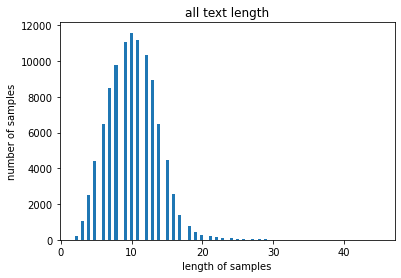

In [96]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
# bins는 가로축 구간의 개수
# (막대 그래프의 갯수)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [99]:
select_length = 25


def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# core_input_tokenized에는 전체 문장 데이터들을 token화 시킨 뒤,
# 의미있는 단어들의 품사들만 필터링한 (불용어 처리한) 단어들의 집함임!    
below_threshold_len(select_length, core_input_tokenized)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9977145070695332


In [100]:
# input 문장들중 핵심 단어 25개인 input들만 사용해서 99% 활용할 수 있음

# 단어 시퀀스 벡터 크기
MAX_SEQ_LEN = 25

### 4) input의 최대 길이를 알았으니 PADDING 처리를 해주자!

In [120]:
# Conv1D, 의도 분류 모델이기 때문에 softmax

# label 종류별 수
# 대인관계            21852
# 진로,취업,직장        10448
# 재정               9924
# 건강,죽음            8444
# 가족관계             8416
# 연애,결혼,출산         8170
# 대인관계(부부, 자녀)     6804
# 학업 및 진로          6566
# 학교폭력/따돌림         6182
# 건강               6044
# 재정,은퇴,노후준비       5476
# 직장, 업무 스트레스      4934

import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

#from utils.Preprocess import Preprocess
# 대신 직접 class 선언해줌! (import 파일 만들기 귀찮음)

class Preprocess:
    def __init__(self, word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/emotion_chatbot_dict.bin' ,userdic=None): # userdic 인자에는 사용자 정의 사전 파일 경로 입력가능
        # 단어 인덱스 사전 불러오기 추가
        if(word2index_dic != ''):
            f = open(word2index_dic, "rb")
            self.word_index = pickle.load(f)
            f.close()
            print("단어 사전 로드 완료..")
        else:
            self.word_index = None
            print("단어 사전 로드 실패..")

        # 형태소 분석기 초기화
        self.komoran = Komoran(userdic=userdic)

        # 제외할 품사
        # 참조 : https://docs.komoran.kr/firststep/postypes.html
        # 관계언 제거, 기호 제거
        # 어미 제거
        # 접미사 제거
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            # 주격조사, 보격조사, 관형격조사, 목적격조사, 부사격조사, 호격조사, 인용격조사
            'JX', 'JC',
            # 보조사, 접속조사
            'SF', 'SP', 'SS', 'SE', 'SO',
            # 마침표,물음표,느낌표(SF), 쉼표,가운뎃점,콜론,빗금(SP), 따옴표,괄호표,줄표(SS), 줄임표(SE), 붙임표(물결,숨김,빠짐)(SO)
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            # 선어말어미, 종결어미, 연결어미, 명사형전성어미, 관형형전성어미
            'XSN', 'XSV', 'XSA'
            # 명사파생접미사, 동사파생접미사, 형용사파생접미사
        ]


    # 형태소 분석기 POS 태거
    def pos(self, sentence):
        return self.komoran.pos(sentence)

    # 불용어 제거 후 필요한 품사 정보만 가져오기
    def get_keywords(self, pos, without_tag=False):
        f = lambda x: x in self.exclusion_tags
        word_list = []
        for p in pos:
            if f(p[1]) is False:
                word_list.append(p if without_tag is False else p[0])
        return word_list

    # 키워드를 단어 인덱스 시퀀스로 변환
    def get_wordidx_sequence(self, keywords):
        if self.word_index is None:
            return []
        w2i = []
        for word in keywords:
            try:
                w2i.append(self.word_index[word])
            except KeyError:
                # 해당 단어가 사전에 없는 경우 OOV 처리
                w2i.append(self.word_index['OOV'])
        return w2i

In [147]:
!pwd

# Load Data
data = pd.read_csv("cnn_train_data.csv")

/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/cnn_train


In [148]:
data.sample(5)

,input,label,encoded_label
68906,내 친구들과의 관계로 아빠랑 말다툼한 이후로 전혀 대화를 안 하고 있거든.,가족관계,0
19741,이번에 부서 이동을 했는데 너무 짜증 나. 스트레스받아.,"직장, 업무 스트레스",8
88470,그래 맞아. 내일 친구에게 무엇 때문에 날 따돌리는지 물어보려고.,학교폭력/따돌림,10
42940,친구가 저번 주에 친 시험을 잘 못 본 줄 모르고 시험 얘기를 하다가 싸웠어.,가족관계,0
62487,친구가 늦잠 자는 바람에 내가 한 시간이나 약속 장소에서 기다렸어.,대인관계,3


In [149]:
# text는 모든 문장들의 list
input = data['input'].tolist()
# label은 모든 label의 list
label = data['encoded_label'].tolist()

In [150]:
data.tail()

,input,label,encoded_label
103255,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,재정,6
103256,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,재정,6
103257,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,재정,6
103258,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,대인관계,3
103259,사람들을 만나는 것이 어려워. 자꾸 사람들을 의심하게만 되고 말이야.,대인관계,3


In [151]:
# Load preprocessor
p = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_최종프로젝트/chatbot_try/chatbot_dict.bin',
               userdic=None)

단어 사전 로드 완료..


In [152]:
# Data preprocess

# !pip install tqdm
from tqdm import tqdm

sequences = []
check_keywords = True
# text는 모든 문장들의 list
for sentence in tqdm(input):

    # 문장을 [(단어1,품사1),(단어2,품사2)...] 로 변환
    pos = p.pos(sentence)

    # get_keywords(pos, without_tag=True) => 불용어 처리 후 품사(태그)없이 단어들만의 list
    # keywords : 불용어 처리된 [(단어1,품사1),(단어2,품사2)...], list형
    keywords = p.get_keywords(pos, without_tag=True)

    # 첫번째 keywords 와 sequence[0] 어떻게 대응되는지 체크해보고 싶음
    if check_keywords is True:
      print(keywords)
      check_keywords = False
    # 태그없이 '단어'만 있는 keywords에서 [[단어1,단어2],[단어1,단어2,단어3]...]들을 인덱싱해줌
    # 우리가 만든 단어사전에 없으면(OOV token이므로 인덱스 1로 고정)
    seq = p.get_wordidx_sequence(keywords)
    sequences.append(seq)

  0%|          | 165/103260 [00:00<01:17, 1326.32it/s]

['일', '왜', '하', '하', '끝', '없', '화가', '나']


100%|██████████| 103260/103260 [02:02<00:00, 840.51it/s]


In [153]:
# 문장에서 의미 있는 품사만 남기고
# index 대응시킴
# ['일', '왜', '하', '하', '끝', '없', '화가', '나']

print(sequences[0])

[97, 110, 2, 2, 536, 47, 2465, 13]


In [154]:
# set padding length & pad to sequences

# import 하지말고 직접 선언!
#from config.GlobalParams import MAX_SEQ_LEN


# 단어 시퀀스 벡터 크기 (데이터 99% 활용가능)
MAX_SEQ_LEN = 25

#from tensorflow.keras import preprocessing
# 최대 크기를 25단어로 하고 그 보다 길이가 작은 문장들은 뒤에 0이라는 의미없는 단어를 을 채워서 문장 길이를 25단어로 맞춤
# https://wikidocs.net/83544
# padding=post 안하면 앞에서 부터 0을 채움

padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [155]:
# 모델에 넣어 학습하기 위해
# 문장별로 단어의 갯수를 25개로 맞춰줌

len(padded_seqs[15000]) ,len(padded_seqs[53000]),len(padded_seqs[78000])

(25, 25, 25)

In [156]:
padded_seqs[15000] ,padded_seqs[53000],padded_seqs[78000]

(array([1241, 3737,   68, 3427,   35,   40,   68,  171,  694,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32),
 array([ 224,  281,  202,   71,    2,   68,  318,    2, 3737,  295,   75,
         201,   28,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32),
 array([  109,   727,  3368,  1321,  1291,  3196,   900,   143,     2,
           18,    58,  3368,   428,    35,     2,   434, 15463,    88,
           21,    16,   356,    16,     0,     0,     0], dtype=int32))

### 5) word2index , PADDING 해준 문장들을 tensor화 시키자!

In [164]:
# data to tensor

# tf.data.Dataset.from_tensor_slices((데이터,라벨))
# 데이터와 라벨을 묶음
# https://yuna96.tistory.com/77
ds = tf.data.Dataset.from_tensor_slices((padded_seqs,label))

# 섞어줌
# 크기만큼 섞어야 다섞임
# https://helloyjam.github.io/tensorflow/buffer-size-in-shuffle/
ds = ds.shuffle(len(input))

In [165]:
# set train & validation & test size

# 갯수 설정
# https://dacon.io/en/codeshare/5774
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

# 교차검증(?) take().take() 잘은 모르겠음
train_ds = ds.take(train_size).batch(100)
val_ds = ds.take(train_size).take(val_size).batch(100)
test_ds = ds.take(train_size + val_size).take(test_size).batch(100)

In [166]:
# Hyperparameter
# https://derekahndev.github.io/machine%20learning/chatbot-3/

dropout_prob = 0.5

EMB_SIZE = 128
EPOCH = 3

# 전체 단어수
VOCAB_SIZE = len(p.word_index) + 1

### 6) CNN 모델 구성, 학습

In [170]:
# CNN model definition
input_layer = Input(shape=(MAX_SEQ_LEN, ))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

# 마지막 predictions 은 레이블 종류 수에 맞게 바꾸어 주어야함
predictions = Dense(12, activation=tf.nn.softmax)(logits)

In [171]:
# CNN model create
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              # 다중분류 : sparse_categorical_crossentropy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [172]:
# train model
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

# evaluate model
loss, accuracy = model.evaluate(test_ds, verbose=1)
print("Accuracy: %f" % (accuracy * 100))
print("loss : %f" % (loss))

# save model
model.save('/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/models/label_classification_model.h5')

Epoch 1/3
723/723 [==============================] - 194s 267ms/step - loss: 2.0439 - accuracy: 0.3133 - val_loss: 1.6578 - val_accuracy: 0.4743
Epoch 2/3
723/723 [==============================] - 190s 262ms/step - loss: 1.6690 - accuracy: 0.4471 - val_loss: 1.5099 - val_accuracy: 0.4938
Epoch 3/3
104/104 [==============================] - 2s 21ms/step - loss: 1.4229 - accuracy: 0.5227
Accuracy: 52.266127
loss : 1.422920


In [177]:
encoded_class = ['가족관계','건강','건강,죽음','대인관계','대인관계(부부, 자녀)','연애,결혼,출산','재정','재정,은퇴,노후준비',
 '직장, 업무 스트레스','진로,취업,직장','학교폭력/따돌림','학업 및 진로']
encoded_class_dict ={}
for i in range(len(encoded_class)):
  encoded_class_dict[i] = encoded_class[i]
encoded_class_dict

{0: '가족관계',
 1: '건강',
 2: '건강,죽음',
 3: '대인관계',
 4: '대인관계(부부, 자녀)',
 5: '연애,결혼,출산',
 6: '재정',
 7: '재정,은퇴,노후준비',
 8: '직장, 업무 스트레스',
 9: '진로,취업,직장',
 10: '학교폭력/따돌림',
 11: '학업 및 진로'}

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
import gc

# 의도 분류 모델 모듈
class IntentModel:
    def __init__(self, model_name, preprocess):

        # ['가족관계' '건강' '건강,죽음' '대인관계' '대인관계(부부, 자녀)' '연애,결혼,출산' '재정' '재정,은퇴,노후준비'
        # '직장, 업무 스트레스' '진로,취업,직장' '학교폭력/따돌림' '학업 및 진로']
        # 의도 클래스별 레이블블
        self.labels = {0: '가족관계',
                        1: '건강',
                        2: '건강,죽음',
                        3: '대인관계',
                        4: '대인관계(부부, 자녀)',
                        5: '연애,결혼,출산',
                        6: '재정',
                        7: '재정,은퇴,노후준비',
                        8: '직장, 업무 스트레스',
                        9: '진로,취업,직장',
                        10: '학교폭력/따돌림',
                        11: '학업 및 진로'}
        # 의도 분류 모델 불러오기
        self.model = load_model(model_name)

        # 챗봇 텍스트 전처리기
        self.p = preprocess

    # 의도 클래스 예측
    def predict_class(self, query):
        # 형태소 분석
        pos = self.p.pos(query)

        # 문장내 키워드 추출(불용어 제거)
        keywords = self.p.get_keywords(pos, without_tag=True)
        sequences = [self.p.get_wordidx_sequence(keywords)]

        # 단어 시퀀스 벡터 크기
        # from config.GlobalParams import MAX_SEQ_LEN
        # 변수로 선언해버림!@@@@@@@@@@@@@@@@@@@@@@@@

        # 패딩처리
        padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

        predict = self.model.predict(padded_seqs)
        predict_class = tf.math.argmax(predict, axis=1)
        return predict_class.numpy()[0]

In [179]:
jp = Preprocess(word2index_dic='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/data/emotion_chatbot_dict.bin',
               userdic=None)

intent = IntentModel(model_name='/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/models/label_classification_model.h5', preprocess=p)

query = "요즘따라 아내가 나한테 관심이 없는 것 같아"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "요즘 사는게 너무 힘들고 괴로워."
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "서울에서 살고 있는 우리 아들이 너무 보고 싶어"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "딸이 집을 나가버렸어. 너무 슬퍼"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "앞으로 병원비 때문에 생활이 힘들어질 것 같아 "
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)


query = "내가 병에 걸려서 오랫동안 치료받아야 한대"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)

query = "우리 부자간은 사이가 참 좋아서 다행이야"
predict = intent.predict_class(query)
predict_label = intent.labels[predict]
print("="*30)
print(query)
print("의도 예측 클래스 : ", predict)
print("의도 예측 레이블 : ", predict_label)
print("="*30)

단어 사전 로드 완료..
1/1 [==============================] - 0s 122ms/step
요즘따라 아내가 나한테 관심이 없는 것 같아
의도 예측 클래스 :  3
의도 예측 레이블 :  대인관계
1/1 [==============================] - 0s 19ms/step
요즘 사는게 너무 힘들고 괴로워.
의도 예측 클래스 :  3
의도 예측 레이블 :  대인관계
1/1 [==============================] - 0s 17ms/step
서울에서 살고 있는 우리 아들이 너무 보고 싶어
의도 예측 클래스 :  3
의도 예측 레이블 :  대인관계
1/1 [==============================] - 0s 18ms/step
딸이 집을 나가버렸어. 너무 슬퍼
의도 예측 클래스 :  3
의도 예측 레이블 :  대인관계
1/1 [==============================] - 0s 17ms/step
앞으로 병원비 때문에 생활이 힘들어질 것 같아 
의도 예측 클래스 :  6
의도 예측 레이블 :  재정
1/1 [==============================] - 0s 19ms/step
내가 병에 걸려서 오랫동안 치료받아야 한대
의도 예측 클래스 :  2
의도 예측 레이블 :  건강,죽음
1/1 [==============================] - 0s 20ms/step
우리 부자간은 사이가 참 좋아서 다행이야
의도 예측 클래스 :  3
의도 예측 레이블 :  대인관계


# 3. 유추한 label 안에서 답변 출력하기

In [183]:
# KR-SBERT 설치
# !pip install -U sentence-transformers
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import torch
from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=db0088ffef756e2659ab5d8f7f9b8b208213cb9a0d397b6ec7004648d7364e25
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [184]:
# train_file : 의도/질문(Query)/답변(Answer)/답변 이미지 총 4개의 칼럼으로 구성된 엑셀

train_file = "/content/drive/MyDrive/새싹_인공지능SW교육/프로젝트/새싹_자연어처리프로젝트/cnn_train/cnn_train_data.csv"
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

ValueError: ignored

In [185]:
df = pd.read_csv(train_file)
df.head()

,input,label,encoded_label
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,"진로,취업,직장",9
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,"진로,취업,직장",9
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,"진로,취업,직장",9
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,"진로,취업,직장",9
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,"진로,취업,직장",9


In [ ]:
df['embedding_vector'] = df['input'].progress_map(lambda x : model.encode(x))
df.head()

 16%|█▌        | 16262/103260 [29:59<2:44:04,  8.84it/s]